In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cleaned_df = pd.read_csv('results/lang_detected.csv')

In [3]:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
df=cleaned_df[cleaned_df['date'].dt.year==2024]

In [4]:
df = df[df['english'] == True]

In [5]:
df.shape

(21532, 6)

# Text - Preprocessing

In [6]:
import re
import string
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    if not isinstance(text, str):  # Handle non-string entries gracefully
        return ""
    
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join back into string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply text cleaning
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)

# Remove rows with fewer than 3 words
df = df[df['cleaned_text'].apply(lambda x: len(x.split()) >= 3)]

# Reset index
df.reset_index(drop=True, inplace=True)

df


[nltk_data] Downloading package stopwords to C:\Users\Babli
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Babli
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Babli
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviewId,comment,score,date,cleaned_text,english
0,6fcd7344-d13e-46f5-ac98-d0ebec6ecb3b,Can you prolong Big bang theory series in Netf...,5,2024-12-31 15:43:14,prolong big bang theory series netflix,True
1,b113fac2-503f-4acf-8480-4f099e7706be,This APP IS VERY GOOD INFACT ULTIMATE I even d...,5,2024-12-31 15:34:33,app good infact ultimate even downloaded tv al...,True
2,39923caa-1af7-4123-859f-76087131ce1c,The app Is very good i just don't like about I...,4,2024-12-31 15:28:40,app good dont like dont enough season watch be...,True
3,1d42e2e0-34ae-4d27-8e14-64f1321e4c33,Amazing customer support and good application.,5,2024-12-31 14:56:34,amazing customer support good application,True
4,b8bd8e14-7692-4e14-aa93-a564fd5453f1,I'm just gonna be real honest here. I can't fi...,1,2024-12-31 14:51:04,im gon na real honest cant find anything watch...,True
...,...,...,...,...,...,...
19190,5746b337-3d55-4475-a311-bd2d105c9c73,Wish I could give it a zero.,1,2024-03-13 15:12:52,wish could give zero,True
19191,b9c8e264-606b-4786-b883-1db215adb5bb,I dont know how to create an acc,1,2024-03-16 05:08:34,dont know create acc,True
19192,3759168b-2cfd-4719-824f-61bcf0082965,"Their is no position for kannada language , do...",1,2024-03-17 15:19:57,position kannada language consider,True
19193,5f68b545-1079-4a57-9024-fc6e27d7db96,The. Best App. Ever,2,2024-04-01 10:21:15,best app ever,True


In [7]:
df.isnull().sum()

reviewId        0
comment         0
score           0
date            0
cleaned_text    0
english         0
dtype: int64

In [8]:
df.shape

(19195, 6)

In [9]:
# df.dropna(inplace=True)
# df['cleaned_text'] = df['cleaned_text'].astype(str)

# Sentence Transformer

## Embedding

In [10]:
from sentence_transformers import SentenceTransformer
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = SentenceTransformer('all-MiniLM-L6-v2', device=device)
embeddings = model.encode(df['cleaned_text'].tolist())
df['embeddings'] = embeddings.tolist()
df

C:\Users\Babli Dey\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,reviewId,comment,score,date,cleaned_text,english,embeddings
0,6fcd7344-d13e-46f5-ac98-d0ebec6ecb3b,Can you prolong Big bang theory series in Netf...,5,2024-12-31 15:43:14,prolong big bang theory series netflix,True,"[-0.04874053969979286, -0.10144119709730148, 0..."
1,b113fac2-503f-4acf-8480-4f099e7706be,This APP IS VERY GOOD INFACT ULTIMATE I even d...,5,2024-12-31 15:34:33,app good infact ultimate even downloaded tv al...,True,"[-0.06196758151054382, -0.06808409839868546, 0..."
2,39923caa-1af7-4123-859f-76087131ce1c,The app Is very good i just don't like about I...,4,2024-12-31 15:28:40,app good dont like dont enough season watch be...,True,"[-0.024188248440623283, -0.04419635981321335, ..."
3,1d42e2e0-34ae-4d27-8e14-64f1321e4c33,Amazing customer support and good application.,5,2024-12-31 14:56:34,amazing customer support good application,True,"[-0.12428845465183258, 0.009883568622171879, 0..."
4,b8bd8e14-7692-4e14-aa93-a564fd5453f1,I'm just gonna be real honest here. I can't fi...,1,2024-12-31 14:51:04,im gon na real honest cant find anything watch...,True,"[-0.04307730123400688, -0.16245083510875702, -..."
...,...,...,...,...,...,...,...
19190,5746b337-3d55-4475-a311-bd2d105c9c73,Wish I could give it a zero.,1,2024-03-13 15:12:52,wish could give zero,True,"[-0.019971445202827454, 0.11629173904657364, -..."
19191,b9c8e264-606b-4786-b883-1db215adb5bb,I dont know how to create an acc,1,2024-03-16 05:08:34,dont know create acc,True,"[-0.1013832539319992, -0.06260945647954941, -0..."
19192,3759168b-2cfd-4719-824f-61bcf0082965,"Their is no position for kannada language , do...",1,2024-03-17 15:19:57,position kannada language consider,True,"[-0.07122289389371872, -0.0007206127629615366,..."
19193,5f68b545-1079-4a57-9024-fc6e27d7db96,The. Best App. Ever,2,2024-04-01 10:21:15,best app ever,True,"[-0.07047479599714279, 0.010615335777401924, 0..."


# Clustering

In [11]:
from hdbscan import HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size = 2, min_samples=1).fit(embeddings)
clusters = hdbscan_model.labels_

In [12]:
unique_labels = np.unique(clusters)
print(f"Clusters found (including noise): {unique_labels}")

Clusters found (including noise): [  -1    0    1 ... 2251 2252 2253]


In [13]:
from collections import Counter

cluster_counts = Counter(clusters)
print("Cluster sizes:")
for label, count in cluster_counts.items():
    print(f"Cluster {label}: {count} points")

Cluster sizes:
Cluster -1: 13012 points
Cluster 2023: 3 points
Cluster 350: 2 points
Cluster 949: 2 points
Cluster 101: 2 points
Cluster 154: 2 points
Cluster 1583: 2 points
Cluster 1678: 4 points
Cluster 1898: 5 points
Cluster 313: 2 points
Cluster 2028: 3 points
Cluster 2188: 4 points
Cluster 1156: 8 points
Cluster 1366: 4 points
Cluster 788: 8 points
Cluster 911: 2 points
Cluster 2113: 15 points
Cluster 332: 5 points
Cluster 1584: 2 points
Cluster 624: 5 points
Cluster 1959: 2 points
Cluster 941: 7 points
Cluster 656: 2 points
Cluster 1135: 2 points
Cluster 499: 6 points
Cluster 1987: 3 points
Cluster 104: 2 points
Cluster 1895: 5 points
Cluster 1642: 2 points
Cluster 682: 2 points
Cluster 2084: 2 points
Cluster 2241: 4 points
Cluster 1264: 9 points
Cluster 2099: 2 points
Cluster 800: 2 points
Cluster 832: 2 points
Cluster 2154: 3 points
Cluster 1122: 2 points
Cluster 993: 10 points
Cluster 63: 2 points
Cluster 1178: 3 points
Cluster 992: 5 points
Cluster 57: 2 points
Cluster 1870: 

In [14]:
df['cluster'] = clusters

In [15]:
df[df['cluster'] == -1]

,reviewId,comment,score,date,cleaned_text,english,embeddings,cluster
0,6fcd7344-d13e-46f5-ac98-d0ebec6ecb3b,Can you prolong Big bang theory series in Netf...,5,2024-12-31 15:43:14,prolong big bang theory series netflix,True,"[-0.04874053969979286, -0.10144119709730148, 0...",-1
3,1d42e2e0-34ae-4d27-8e14-64f1321e4c33,Amazing customer support and good application.,5,2024-12-31 14:56:34,amazing customer support good application,True,"[-0.12428845465183258, 0.009883568622171879, 0...",-1
4,b8bd8e14-7692-4e14-aa93-a564fd5453f1,I'm just gonna be real honest here. I can't fi...,1,2024-12-31 14:51:04,im gon na real honest cant find anything watch...,True,"[-0.04307730123400688, -0.16245083510875702, -...",-1
6,7b1b7cfb-80c1-4c37-bf37-4238b6aa4bac,I only downloaded this to leave the following....,1,2024-12-31 14:42:16,downloaded leave following bombarded wwe thats...,True,"[-0.01574796810746193, 0.02808918058872223, -0...",-1
7,1fdbd9a0-89ef-47df-994b-3e11ec5006a2,I can't get anything on my Samsung Galaxy! All...,1,2024-12-31 14:35:02,cant get anything samsung galaxy get code sayi...,True,"[-0.09921467304229736, 0.046942226588726044, 0...",-1
...,...,...,...,...,...,...,...,...
19189,e57a4c29-be36-47a1-9f27-8725531cf96d,I'm using Netflix More than five,5,2024-03-15 09:04:02,im using netflix five,True,"[0.009625386446714401, -0.20069588720798492, -...",-1
19190,5746b337-3d55-4475-a311-bd2d105c9c73,Wish I could give it a zero.,1,2024-03-13 15:12:52,wish could give zero,True,"[-0.019971445202827454, 0.11629173904657364, -...",-1
19191,b9c8e264-606b-4786-b883-1db215adb5bb,I dont know how to create an acc,1,2024-03-16 05:08:34,dont know create acc,True,"[-0.1013832539319992, -0.06260945647954941, -0...",-1
19192,3759168b-2cfd-4719-824f-61bcf0082965,"Their is no position for kannada language , do...",1,2024-03-17 15:19:57,position kannada language consider,True,"[-0.07122289389371872, -0.0007206127629615366,...",-1


In [16]:
df[df['cluster'] != -1].to_csv('cluestered.csv', index=False)

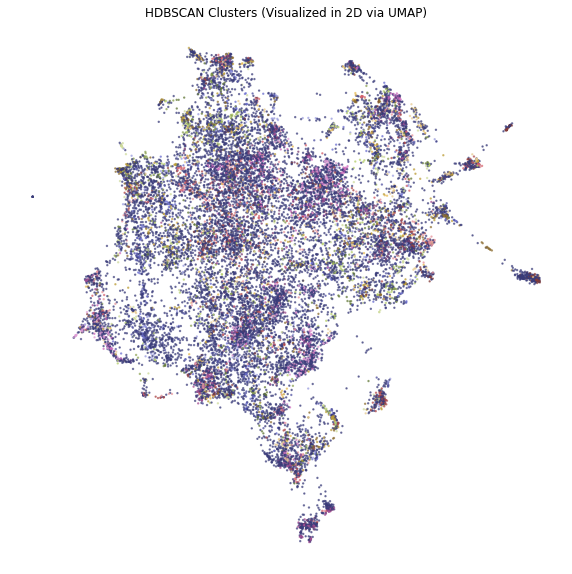

In [17]:
import umap

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
embedding_2d = umap_model.fit_transform(embeddings)

plt.figure(figsize=(10, 10))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=clusters, cmap='tab20b', alpha=0.6, s=2)
plt.axis("off")
plt.title("HDBSCAN Clusters (Visualized in 2D via UMAP)")
plt.show()


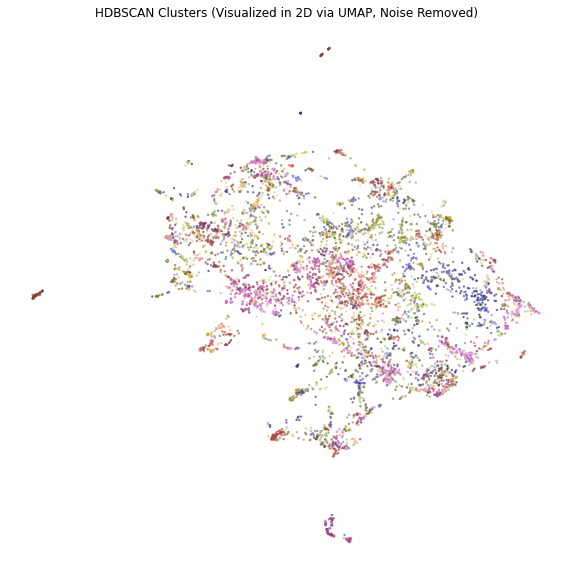

In [18]:
import umap
import matplotlib.pyplot as plt

# Filter out noise points
non_noise_mask = clusters != -1
non_noise_embeddings = embeddings[non_noise_mask]
non_noise_clusters = clusters[non_noise_mask]

# Apply UMAP on non-noise data
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
embedding_2d = umap_model.fit_transform(non_noise_embeddings)

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=non_noise_clusters, cmap='tab20b', alpha=0.6, s=2)
plt.axis("off")
plt.title("HDBSCAN Clusters (Visualized in 2D via UMAP, Noise Removed)")
plt.show()


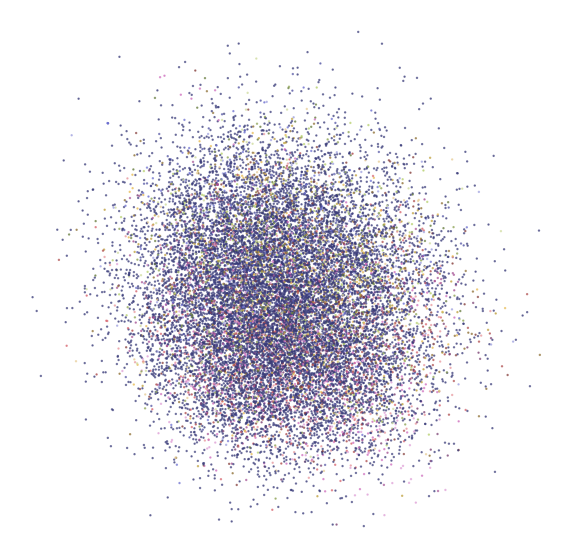

In [19]:
plt.figure(figsize=(10, 10))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=clusters, cmap='tab20b', alpha=0.6, s=2)
plt.axis("off")
plt.show()

In [20]:
# Reduce to 10 or more dimensions for clustering
umap_highdim = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=10, metric='euclidean', random_state=42)
embedding_10d = umap_highdim.fit_transform(embeddings)


C:\Users\Babli Dey\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [21]:
from hdbscan import HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size = 2, min_samples=1).fit(embedding_10d)
clusters = hdbscan_model.labels_

In [22]:
unique_labels = np.unique(clusters)
print(f"Clusters found (including noise): {unique_labels}")

Clusters found (including noise): [  -1    0    1 ... 4365 4366 4367]


In [23]:
cluster_counts = Counter(clusters)
print("Cluster sizes:")
for label, count in cluster_counts.items():
    print(f"Cluster {label}: {count} points")

Cluster sizes:
Cluster 2741: 2 points
Cluster -1: 5319 points
Cluster 3159: 3 points
Cluster 1365: 3 points
Cluster 1938: 2 points
Cluster 815: 3 points
Cluster 2878: 6 points
Cluster 2830: 23 points
Cluster 4192: 4 points
Cluster 3743: 3 points
Cluster 662: 4 points
Cluster 2284: 15 points
Cluster 2873: 2 points
Cluster 1328: 2 points
Cluster 2400: 2 points
Cluster 1857: 3 points
Cluster 2024: 7 points
Cluster 4327: 2 points
Cluster 1743: 2 points
Cluster 2394: 2 points
Cluster 1852: 2 points
Cluster 3163: 2 points
Cluster 3394: 3 points
Cluster 2301: 9 points
Cluster 4112: 3 points
Cluster 2941: 37 points
Cluster 1653: 28 points
Cluster 3412: 13 points
Cluster 3244: 2 points
Cluster 2010: 11 points
Cluster 1510: 4 points
Cluster 1714: 3 points
Cluster 2908: 5 points
Cluster 511: 9 points
Cluster 1849: 9 points
Cluster 3036: 4 points
Cluster 1896: 9 points
Cluster 3402: 3 points
Cluster 3128: 5 points
Cluster 3201: 3 points
Cluster 1246: 4 points
Cluster 248: 14 points
Cluster 1371: 2

C:\Users\Babli Dey\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


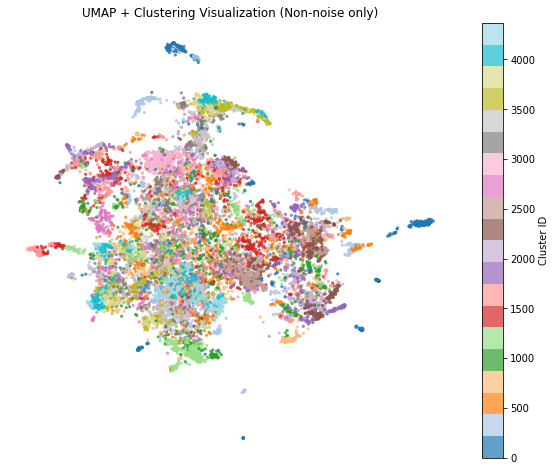

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import umap

# Step 1: Filter noise
non_noise_mask = clusters != -1
embeddings_non_noise = embeddings[non_noise_mask]
filtered_clusters = clusters[non_noise_mask]

# Step 2: UMAP on non-noise
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = umap_model.fit_transform(embeddings_non_noise)

# Step 3: Plot
plt.figure(figsize=(10, 8))
plt.scatter(
    embedding_2d[:, 0], 
    embedding_2d[:, 1], 
    c=filtered_clusters, 
    cmap='tab20', 
    s=5, 
    alpha=0.7
)
plt.title("UMAP + Clustering Visualization (Non-noise only)")
plt.axis("off")
plt.colorbar(label="Cluster ID")
plt.show()


C:\Users\Babli Dey\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


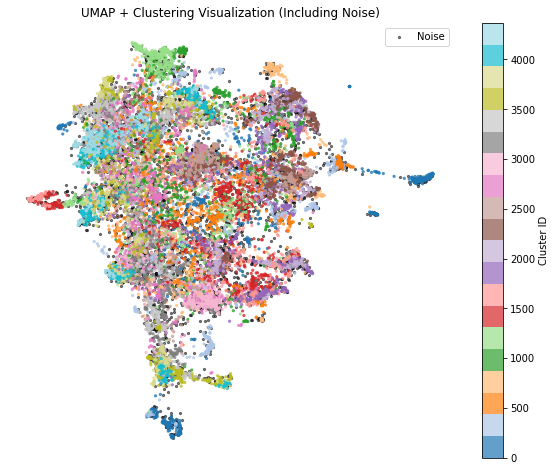

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import umap

# Step 1: Run UMAP on ALL embeddings
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = umap_model.fit_transform(embeddings)

# Step 2: Prepare mask for noise vs clusters
clusters = np.array(clusters)  # make sure it's a NumPy array
is_noise = clusters == -1
not_noise = clusters != -1

# Step 3: Plot — first noise, then clusters
plt.figure(figsize=(10, 8))

# Plot noise in light gray
plt.scatter(
    embedding_2d[is_noise, 0],
    embedding_2d[is_noise, 1],
    c='black',
    s=5,
    alpha=0.5,
    label='Noise'
)

# Plot real clusters with colormap
plt.scatter(
    embedding_2d[not_noise, 0],
    embedding_2d[not_noise, 1],
    c=clusters[not_noise],
    cmap='tab20',
    s=5,
    alpha=0.7
)

plt.title("UMAP + Clustering Visualization (Including Noise)")
plt.axis("off")
plt.legend()
plt.colorbar(label="Cluster ID")
plt.show()


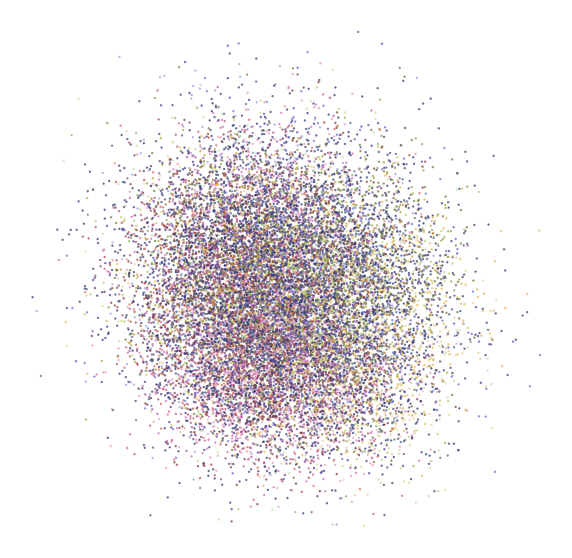

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=clusters, cmap='tab20b', alpha=0.6, s=2)
plt.axis("off")
plt.show()

In [27]:
df['cluster']=clusters
df.to_csv('cluestered.csv', index=False)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# 1. Select documents in a specific cluster
cluster_id = 2
cluster_mask = clusters == cluster_id
cluster_docs = np.array(df['comment'])[cluster_mask]

print(f"{len(cluster_docs)} documents in cluster {cluster_id}")

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_cluster = vectorizer.fit_transform(cluster_docs)


lda = LatentDirichletAllocation(n_components=10, random_state=42)  # choose #topics per cluster
lda.fit(X_cluster)

def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic #{idx}:")
        print(", ".join([words[i] for i in topic.argsort()[:-top_n - 1:-1]]))

print_topics(lda, vectorizer)

7 documents in cluster 2

Topic #0:
chromebook, fix, app

Topic #1:
fix, chromebook, app

Topic #2:
chromebook, fix, app

Topic #3:
chromebook, fix, app

Topic #4:
chromebook, app, fix

Topic #5:
chromebook, fix, app

Topic #6:
app, fix, chromebook

Topic #7:
chromebook, fix, app

Topic #8:
chromebook, fix, app

Topic #9:
chromebook, fix, app
